In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 


In [2]:
df = pd.read_excel('Call_Center.xlsx')

In [3]:
df

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call_Call_duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,44133,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,44109,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,44108,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,44121,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,44121,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA
...,...,...,...,...,...,...,...,...,...,...,...,...
32936,BRM-96715111-h-155613-wO,Othelia Ouldcott,Neutral,NaN,44134,Billing Question,Oklahoma City,Oklahoma,Web,Within SLA,13,Denver/CO
32937,UJH-96531654-y-074703-H4,Tasha Cubbinelli,Negative,NaN,44111,Billing Question,Crawfordsville,Indiana,Chatbot,Within SLA,42,Baltimore/MD
32938,WDS-58440679-I-064360-TT,Margaux Slaten,Negative,NaN,44108,Billing Question,Lehigh Acres,Florida,Chatbot,Within SLA,30,Baltimore/MD
32939,FTZ-87704815-T-824288-iC,Odey Seed,Positive,8.0,44131,Payments,Salt Lake City,Utah,Call-Center,Within SLA,38,Baltimore/MD


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             32941 non-null  object 
 1   customer_name                  32941 non-null  object 
 2   sentiment                      32941 non-null  object 
 3   csat_score                     12271 non-null  float64
 4   call_timestamp                 32941 non-null  int64  
 5   reason                         32941 non-null  object 
 6   city                           32941 non-null  object 
 7   state                          32941 non-null  object 
 8   channel                        32941 non-null  object 
 9   response_time                  32941 non-null  object 
 10  call_Call_duration in minutes  32941 non-null  int64  
 11  call_center                    32941 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usag

In [5]:
df.describe()

,csat_score,call_timestamp,call_Call_duration in minutes
count,12271.000000,32941.000000,32941.000000
mean,5.548448,44119.535594,25.021159
std,2.371059,8.626046,11.816218
min,1.000000,44105.000000,5.000000
25%,4.000000,44112.000000,15.000000
50%,5.000000,44120.000000,25.000000
75%,7.000000,44127.000000,35.000000
max,10.000000,44135.000000,45.000000


In [6]:
df.columns 

Index(['id', 'customer_name', 'sentiment', 'csat_score', 'call_timestamp',
       'reason', 'city', 'state', 'channel', 'response_time',
       'call_Call_duration in minutes', 'call_center'],
      dtype='object')

In [7]:
df.isnull().sum()

id                                   0
customer_name                        0
sentiment                            0
csat_score                       20670
call_timestamp                       0
reason                               0
city                                 0
state                                0
channel                              0
response_time                        0
call_Call_duration in minutes        0
call_center                          0
dtype: int64

# Data Exploration

In [9]:
df['reason'].value_counts()

Billing Question    23462
Payments             4749
Service Outage       4730
Name: reason, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Reasons for Contacting the CRs')

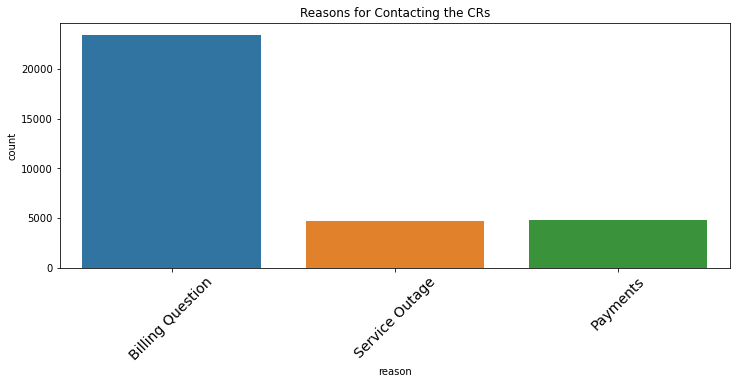

In [15]:
plt.figure(figsize=(12,4.5))
sns.countplot('reason', data=df)
plt.xticks(rotation=45,size=14)
plt.title('Reasons for Contacting the CRs')

In [16]:
df['sentiment'].value_counts()

Negative         11063
Neutral           8754
Very Negative     6026
Positive          3928
Very Positive     3170
Name: sentiment, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers Feed Back')

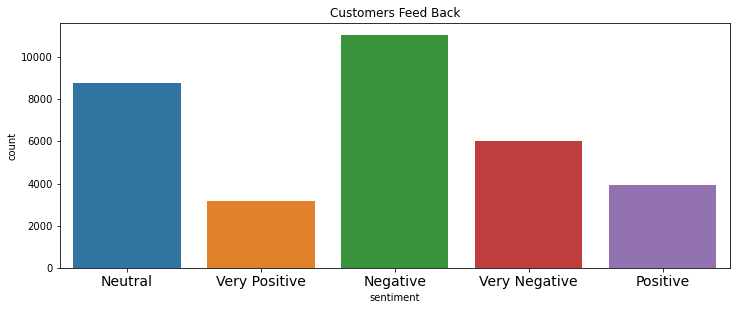

In [20]:
plt.figure(figsize=(12,4.5))
sns.countplot('sentiment', data=df)
plt.xticks(size=14)
plt.title('Customers Feed Back')

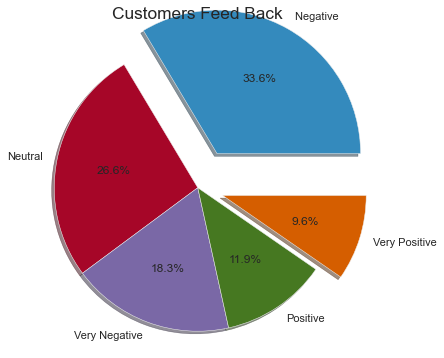

In [59]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
slices=[11063,8754,6026,3928,3170]
explode= [0.3,0,0,0,0.2]
labels=['Negative ','Neutral','Very Negative','Positive','Very Positive']
plt.pie(slices, labels=labels,explode=explode,radius= 1.1, shadow=True,autopct='%1.1f%%')
plt.title('Customers Feed Back')
plt.xticks(size=14)
plt.show()

In [24]:
df['channel'].value_counts()

Call-Center    10639
Chatbot         8256
Email           7470
Web             6576
Name: channel, dtype: int64

In [26]:
channel_df = pd.DataFrame(df['channel'].value_counts()) 

In [27]:
channel_df

,channel
Call-Center,10639
Chatbot,8256
Email,7470
Web,6576


Text(0.5, 1.0, 'Most used Contact Channel')

<Figure size 864x432 with 0 Axes>

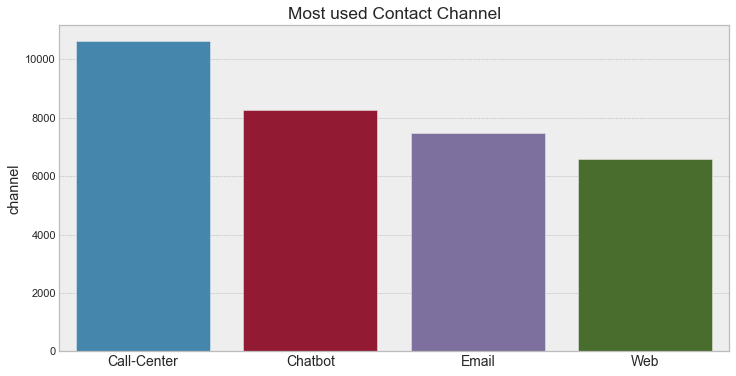

In [45]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.figure(figsize = (12,6))
sns.barplot(x =channel_df.index , y = channel_df['channel'])
plt.xticks(size=14)
plt.title('Most used Contact Channel')

In [35]:
df['call_center'].value_counts()

Los Angeles/CA    13734
Baltimore/MD      11012
Chicago/IL         5419
Denver/CO          2776
Name: call_center, dtype: int64

In [36]:
call_center_df = pd.DataFrame(df['call_center'].value_counts())
call_center_df

,call_center
Los Angeles/CA,13734
Baltimore/MD,11012
Chicago/IL,5419
Denver/CO,2776


Text(0.5, 1.0, 'Location of Call Centers with the most Calls')

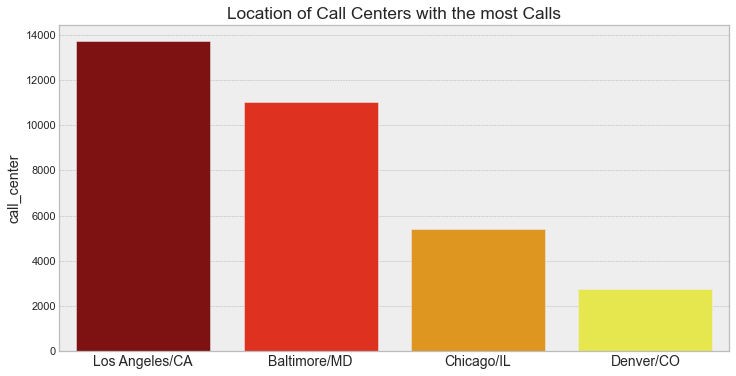

In [47]:
plt.figure(figsize = (12,6))
sns.barplot(x =call_center_df.index , y = call_center_df['call_center'], palette = 'hot')
plt.xticks(size=14)
plt.title('Location of Call Centers with the most Calls')

In [49]:
df['call_timestamp'] = pd.to_datetime(df['call_timestamp'])

In [50]:
df.dtypes

id                                       object
customer_name                            object
sentiment                                object
csat_score                              float64
call_timestamp                   datetime64[ns]
reason                                   object
city                                     object
state                                    object
channel                                  object
response_time                            object
call_Call_duration in minutes             int64
call_center                              object
dtype: object